<div style="text-align: center; font-family: 'Georgia'; font-size: 19px;">
    <h2>Lista 3</h2>
</div>

<div style="text-align: font-family: 'Georgia'; font-size: 12px;">
    <h2>Zadanie 1</h2>
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [8]:
alphas = [0.01, 0.05]
sigmas = [0.01, 0.5, 1]
ns = [100, 1000, 5000]

In [1]:
def b1_estim(x,y):
    return np.sum((x - np.mean(x)) * (y))/np.sum((x-np.mean(x))**2)

In [2]:
def b0_estim(x,y):
    return np.mean(y) - b1_estim(x,y) * np.mean(x)

In [33]:
def przedział_ufności_b1(sigma, alpha, x):
    return stats.norm.ppf(1-alpha/2) * sigma / np.sqrt(np.sum((x-np.mean(x))**2))

In [34]:
def przedział_ufności_b0(sigma, alpha, x):
    return stats.norm.ppf(1 - alpha/2) * sigma * np.sqrt((1/ len(x) + np.mean(x)**2 / np.sum((x-np.mean(x))**2)))

In [35]:
def generowanie_próbek(n, b0, b1, sigma):
    eps = np.random.normal(0, sigma, n)
    x = np.linspace(1, n+1, n)
    y = b1 * x + b0 + eps
    return x, y

In [38]:
b0_teo=1
b1_teo=2

for alpha in alphas:
    for sigma in sigmas:
        for n in ns:
            x, y = generowanie_próbek(n, b0_teo, b1_teo, sigma)
            
            beta1_hat = b1_estim(x, y)
            beta0_hat = b0_estim(x, y)
        
            ci_b1 = (beta1_hat - przedział_ufności_b1(sigma, alpha, x), 
                     beta1_hat + przedział_ufności_b1(sigma, alpha, x))
            ci_b0 = (beta0_hat - przedział_ufności_b0(sigma, alpha, x), 
                     beta0_hat + przedział_ufności_b0(sigma, alpha, x))
        
            print(f'alpha={alpha}, sigma={sigma}, n={n}')
            print(f'  Szacowanie beta1: {beta1_hat:.4f}, Przedział ufności beta1: {ci_b1}')
            print(f'  Szacowanie beta0: {beta0_hat:.4f}, Przedział ufności beta0: {ci_b0}')
            print('-' * 60)

alpha=0.01, sigma=0.01, n=100
  Szacowanie beta1: 2.0000, Przedział ufności beta1: (1.999910882752838, 2.00008756568933)
  Szacowanie beta0: 0.9992, Przedział ufności beta0: (0.9940029337910298, 1.0043824636160186)
------------------------------------------------------------
alpha=0.01, sigma=0.01, n=1000
  Szacowanie beta1: 2.0000, Przedział ufności beta1: (1.999996864544076, 2.0000025022627907)
  Szacowanie beta0: 1.0001, Przedział ufności beta0: (0.9984826875941225, 1.0017433228656327)
------------------------------------------------------------
alpha=0.01, sigma=0.01, n=5000
  Szacowanie beta1: 2.0000, Przedział ufności beta1: (1.9999996362488943, 2.0000001409053496)
  Szacowanie beta0: 1.0004, Przedział ufności beta0: (0.9996312256834446, 1.001088553283878)
------------------------------------------------------------
alpha=0.01, sigma=0.5, n=100
  Szacowanie beta1: 1.9989, Przedział ufności beta1: (1.9945162225870736, 2.0033503694116934)
  Szacowanie beta0: 1.0595, Przedział ufnoś

In [39]:
#symulacja MC

def mc_test(n, sigma, b0, b1, mc, alpha):
    b1_in, b0_in = 0,0
    for _ in range(mc):
        x, y = generowanie_próbek(n, b0, b1, sigma)
        b1_hat, b0_hat = b1_estim(x,y), b0_estim(x, y)
        pu_b0_, pu_b1_ = przedział_ufności_b0(sigma, alpha, x), przedział_ufności_b1(sigma, alpha, x)
        if b1_hat - pu_b1_ < b1 < b1_hat + pu_b1_:
            b1_in += 1
        if b0_hat - pu_b0_ < b0 < b0_hat + pu_b0_:
            b0_in += 1
    return b1_in / mc, b0_in / mc

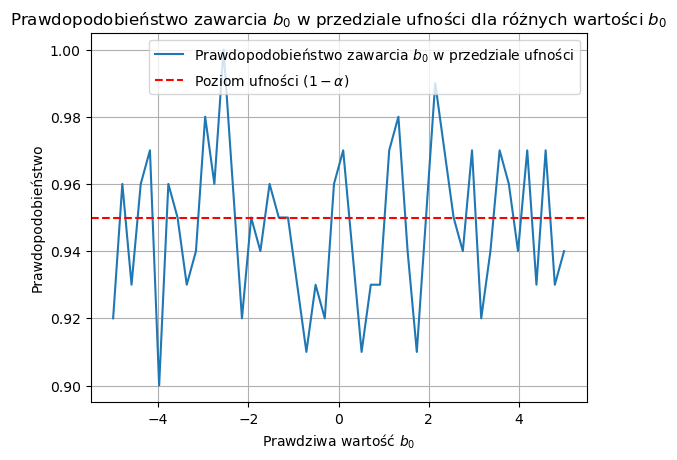

In [45]:
import matplotlib.pyplot as plt

b1_prob, b0_prob = [], []
mc= 100
b1=2 
b0_values = np.linspace(-5, 5, 50) 


for b0 in b0_values:
    p_b1, p_b0 = mc_test(n, sigma, b0, b1, mc, alpha)
    b1_prob.append(p_b1)
    b0_prob.append(p_b0)



plt.plot(b0_values, b0_prob, label=r'Prawdopodobieństwo zawarcia $b_0$ w przedziale ufności')
plt.xlabel(r'Prawdziwa wartość $b_0$')
plt.ylabel('Prawdopodobieństwo')
plt.title('Prawdopodobieństwo zawarcia $b_0$ w przedziale ufności dla różnych wartości $b_0$')
plt.axhline(y=1-alpha, color='red', linestyle='--', label=r'Poziom ufności $(1-\alpha)$')
plt.legend()
plt.grid()
plt.show()

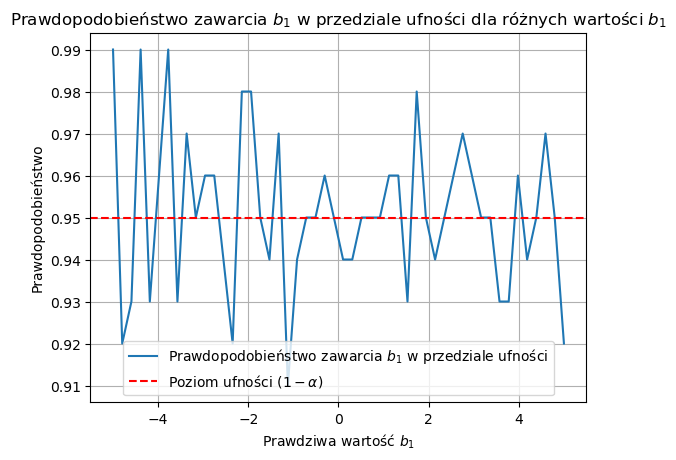

In [49]:
import matplotlib.pyplot as plt

b1_prob, b0_prob = [], []
mc= 100
b0=1 
b1_values = np.linspace(-5, 5, 50) 

n=100
sigma=0.01
alpha= 0.05

for b1 in b1_values:
    p_b1, p_b0 = mc_test(n, sigma, b0, b1, mc, alpha)
    b1_prob.append(p_b1)
    b0_prob.append(p_b0)



plt.plot(b0_values, b0_prob, label=r'Prawdopodobieństwo zawarcia $b_1$ w przedziale ufności')
plt.xlabel(r'Prawdziwa wartość $b_1$')
plt.ylabel('Prawdopodobieństwo')
plt.title('Prawdopodobieństwo $b_1$ w p.ufności dla różnych wartości $b_1$, sigma=0.01')
plt.axhline(y=1-alpha, color='red', linestyle='--', label=r'Poziom ufności $(1-\alpha)$')
plt.legend()
plt.grid()
plt.show()

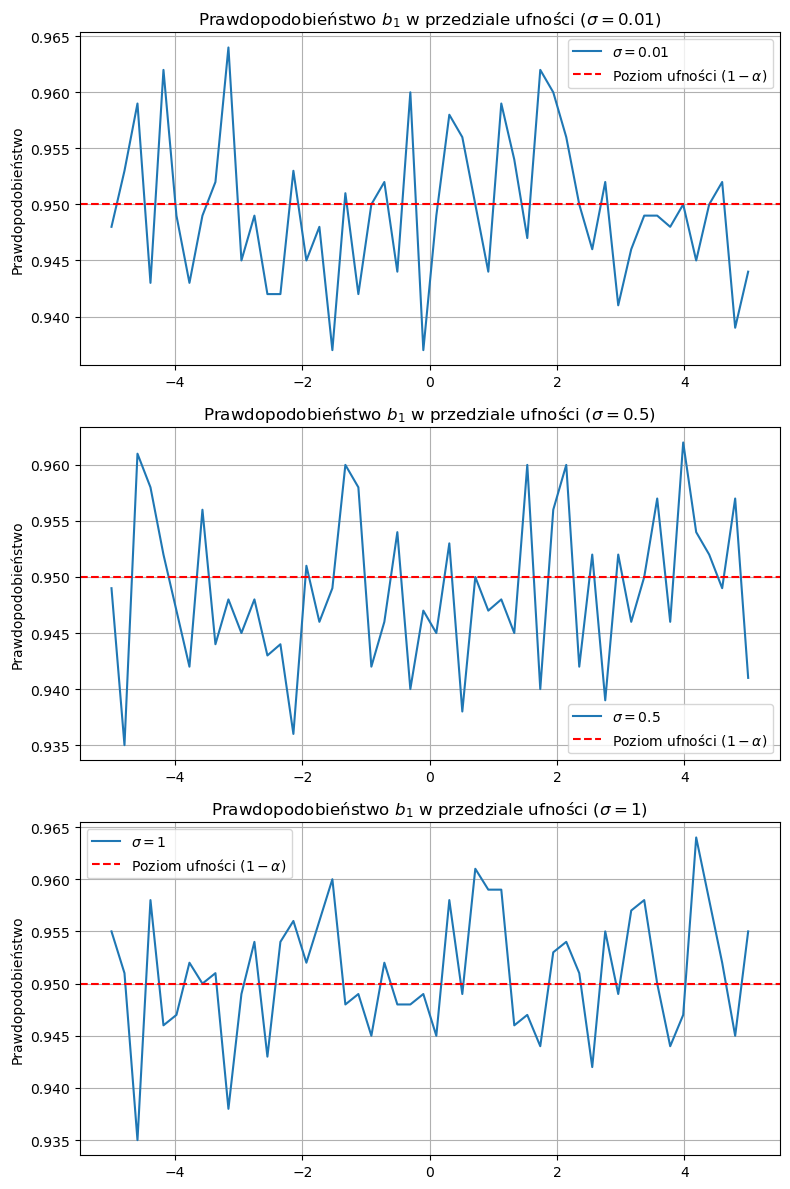

In [58]:
import numpy as np
import matplotlib.pyplot as plt

b1_probabilities = {}
mc = 1000  
b0 = 1
b1_values = np.linspace(-5, 5, 50)  
n = 100
alpha = 0.05
sigma_values = [0.01, 0.5, 1]  

for sigma in sigma_values:
    b1_prob = []
    for b1 in b1_values:
        p_b1, p_b0 = mc_test(n, sigma, b0, b1, mc, alpha)
        b1_prob.append(p_b1)
    
    b1_probabilities[sigma] = b1_prob  


fig, axs = plt.subplots(len(sigma_values), 1, figsize=(8, 4 * len(sigma_values)))


for i, sigma in enumerate(sigma_values):
    ax = axs[i]
    ax.plot(b1_values, b1_probabilities[sigma], label=f'$\\sigma={sigma}$')
    ax.axhline(y=1 - alpha, color='red', linestyle='--', label=r'Poziom ufności $(1-\alpha)$')
    ax.set_ylabel('Prawdopodobieństwo')
    ax.set_title(f'Prawdopodobieństwo $b_1$ w przedziale ufności ($\\sigma={sigma}$)')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


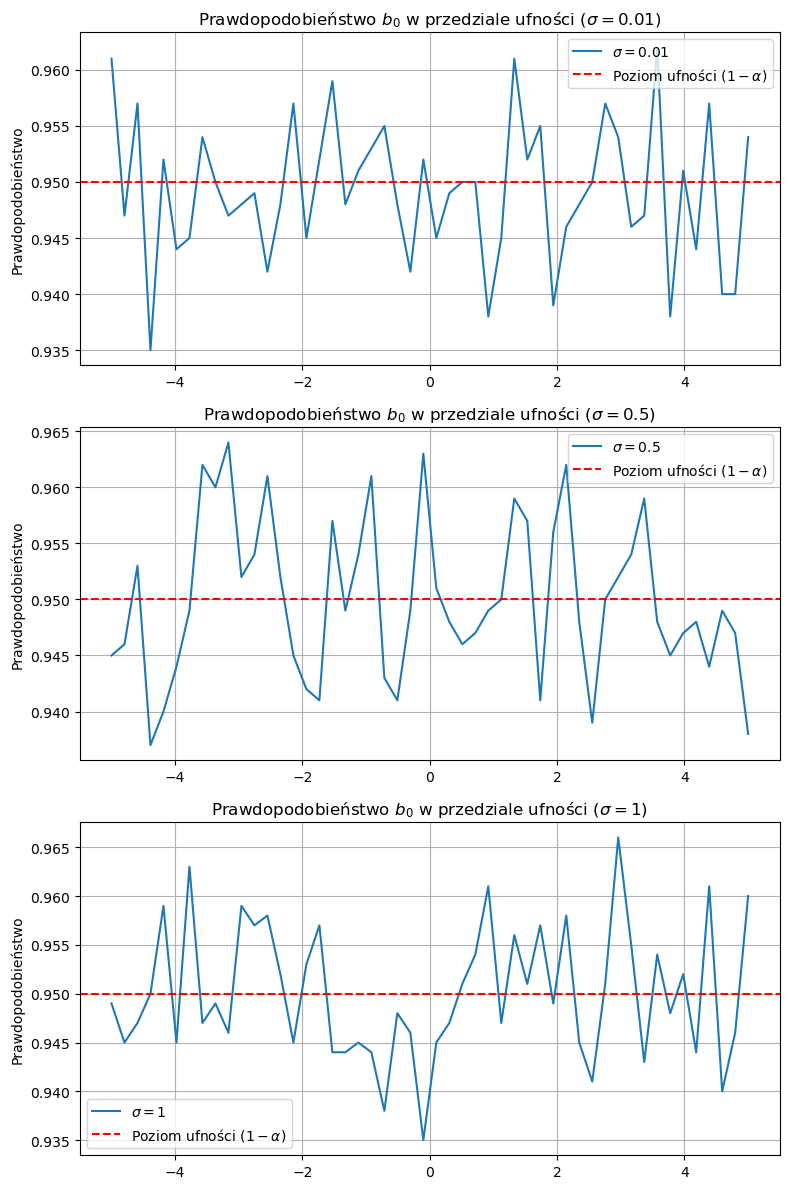

In [57]:
import numpy as np
import matplotlib.pyplot as plt

b0_probabilities = {}
mc = 1000
b1 = 2
b0_values = np.linspace(-5, 5, 50)  
n = 100
alpha = 0.05
sigma_values = [0.01, 0.5, 1]  

for sigma in sigma_values:
    b0_prob = []
    for b0 in b0_values:
        p_b1, p_b0 = mc_test(n, sigma, b0, b1, mc, alpha)
        b0_prob.append(p_b0)
    
    b0_probabilities[sigma] = b0_prob  


fig, axs = plt.subplots(len(sigma_values), 1, figsize=(8, 4 * len(sigma_values)))


for i, sigma in enumerate(sigma_values):
    ax = axs[i]
    ax.plot(b0_values, b0_probabilities[sigma], label=f'$\\sigma={sigma}$')
    ax.axhline(y=1 - alpha, color='red', linestyle='--', label=r'Poziom ufności $(1-\alpha)$')
    ax.set_ylabel('Prawdopodobieństwo')
    ax.set_title(f'Prawdopodobieństwo $b_0$ w przedziale ufności ($\\sigma={sigma}$)')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


In [44]:
print(mc_test(1000, 0.01, 1, 2, 100, 0.05))

(0.96, 0.96)


<div style="text-align: font-family: 'Georgia'; font-size: 12px;">
    <h2>Zadanie 2</h2>
</div>

In [119]:
def p_ufności_b02(alpha, x, y, b1_hat):
    n = len(x)
    residuals = y - (b1_hat * x + np.mean(y) - b1_hat * np.mean(x))
    s_squared = np.sum(residuals**2) / (n - 2)
    s = np.sqrt(s_squared)
    return stats.t.ppf(1 - alpha/2, n - 2) * s * np.sqrt(1/n + np.mean(x)**2 / np.sum((x - np.mean(x))**2))

In [120]:
def p_ufności_b12(alpha, x, y, b1_hat):
    n = len(x)
    residuals = y - (b1_hat * x + np.mean(y) - b1_hat * np.mean(x))
    s_squared = np.sum(residuals**2) / (n - 2)  
    s = np.sqrt(s_squared)
    return stats.t.ppf(1 - alpha/2, n - 2) * s / np.sqrt(np.sum((x - np.mean(x))**2))

In [124]:
def różnica_dł_przedziałow(sigma, b0, b1, alpha):
    x, y = generowanie_próbek(n, b0, b1, sigma)
    b1_hat, b0_hat = b1_estim(x,y), b0_estim(x, y)
    pu_b0_znana_var, pu_b1_znana_var = przedział_ufności_b0(sigma, alpha, x), przedział_ufności_b1(sigma, alpha, x)
    pu_b0_nieznana_var, pu_b1_nieznana_var = p_ufności_b02(alpha, x, y, b1_hat), p_ufności_b12(alpha, x, y, b1_hat)
    return pu_b0_nieznana_var - pu_b0_znana_var, pu_b1_nieznana_var- pu_b1_znana_var

In [127]:
for alpha in alphas:
    for sigma in sigmas:
        for n in ns:
            b0_r, b1_r = różnica_dł_przedziałow(sigma, b0, b1, alpha)
            print(f"Różnica długości przedziałów dla alpha = {alpha}, sigma = {sigma}, n = {n}\nb1 = {b1_r}\nb2 = {b0_r}")

Różnica długości przedziałów dla alpha = 0.01, sigma = 0.01, n = 100
b1 = 5.727915974867184e-07
b2 = 3.364958488717446e-05
Różnica długości przedziałów dla alpha = 0.01, sigma = 0.01, n = 1000
b1 = 7.591405608748129e-08
b2 = 4.390571105043176e-05
Różnica długości przedziałów dla alpha = 0.01, sigma = 0.01, n = 5000
b1 = 2.4209500085345944e-09
b2 = 6.991126794997382e-06
Różnica długości przedziałów dla alpha = 0.01, sigma = 0.5, n = 100
b1 = 9.8707425546532e-05
b2 = 0.005798730130638141
Różnica długości przedziałów dla alpha = 0.01, sigma = 0.5, n = 1000
b1 = 4.3729458033289845e-06
b2 = 0.0025291402511665173
Różnica długości przedziałów dla alpha = 0.01, sigma = 0.5, n = 5000
b1 = -4.024897429859864e-08
b2 = -0.00011622944781929795
Różnica długości przedziałów dla alpha = 0.01, sigma = 1, n = 100
b1 = 0.0006274261047059596
b2 = 0.03685917891144075
Różnica długości przedziałów dla alpha = 0.01, sigma = 1, n = 1000
b1 = 8.09983144056057e-06
b2 = 0.004684624654710062
Różnica długości przed

Wnioski:
- Przedziały dla nieznanej wariancji wychodzą zazwyczaj dłuższe, więc test jest mniej dokładny
- Przedział ufności uwzględnia dodatkową niepewność wynikającą z estymacji wariancji. Jest szerszy, szczególnie przy małych próbach.
- Przedział ufności jest węższy i bardziej precyzyjny, ponieważ opiera się na założeniu o znanej wariancji populacji.

In [144]:
def mc_test3(n, sigma, b0, b1, mc, alpha, known_var):
    b1_in, b0_in = 0,0
    for _ in range(mc):
        x, y = generowanie_próbek(n, b0, b1, sigma)
        b1_hat, b0_hat = b1_estim(x,y), b0_estim(x, y)
        if known_var:
            pu_b0_, pu_b1_ = przedział_ufności_b0(sigma, alpha, x), przedział_ufności_b1(sigma, alpha, x)
        else:
            pu_b0_, pu_b1_ = p_ufności_b02(alpha, x, y, b1_hat), p_ufności_b12(alpha, x, y, b1_hat)
        if b1_hat - pu_b1_ < b1 < b1_hat + pu_b1_:
            b1_in += 1
        if b0_hat - pu_b0_ < b0 < b0_hat + pu_b0_:
            b0_in += 1
    return b1_in / mc, b0_in / mc

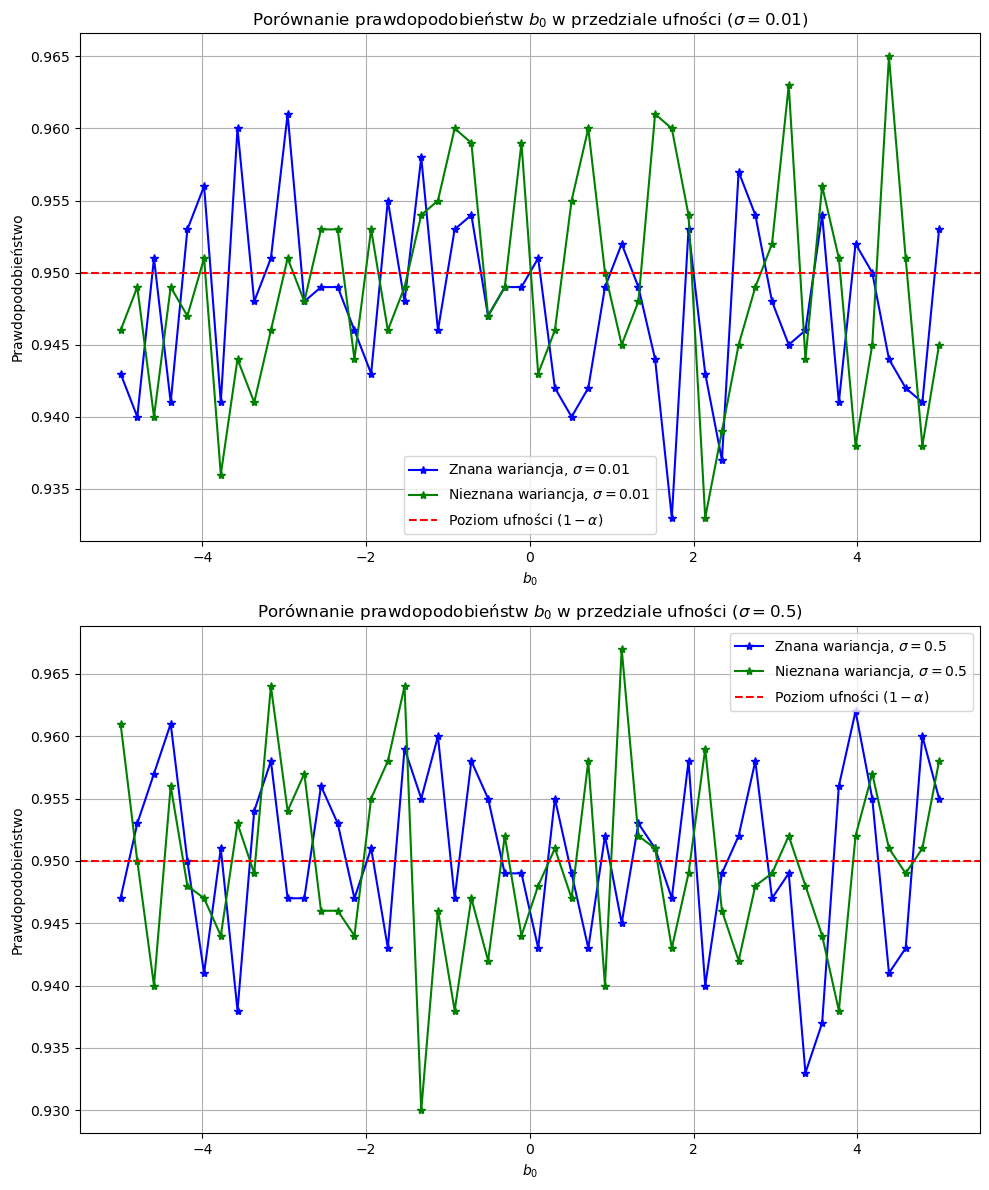

In [145]:
import numpy as np
import matplotlib.pyplot as plt

b0_probabilities_known = {}
b0_probabilities_unknown = {}
mc = 1000
b1 = 2
b0_values = np.linspace(-5, 5, 50)  
n = 100
alpha = 0.05
sigma_values = [0.01, 0.5]  


for sigma in sigma_values:
    b0_prob_known = []
    b0_prob_unknown = []
    
    for b0 in b0_values:
        p_b1_known, p_b0_known = mc_test3(n, sigma, b0, b1, mc, alpha, known_var=True)
        b0_prob_known.append(p_b0_known)
        
        p_b1_unknown, p_b0_unknown = mc_test3(n, sigma, b0, b1, mc, alpha, known_var=False)
        b0_prob_unknown.append(p_b0_unknown)
    
 
    b0_probabilities_known[sigma] = b0_prob_known
    b0_probabilities_unknown[sigma] = b0_prob_unknown

fig, axs = plt.subplots(len(sigma_values), 1, figsize=(10, 6 * len(sigma_values)))

for i, sigma in enumerate(sigma_values):
    ax = axs[i]
   
    ax.plot(b0_values, b0_probabilities_known[sigma], 'b*-', label=f'Znana wariancja, $\\sigma={sigma}$')
    ax.plot(b0_values, b0_probabilities_unknown[sigma], 'g*-', label=f'Nieznana wariancja, $\\sigma={sigma}$')
    ax.axhline(y=1 - alpha, color='red', linestyle='--', label=r'Poziom ufności $(1-\alpha)$')
    
    ax.set_ylabel('Prawdopodobieństwo')
    ax.set_xlabel('$b_0$')
    ax.set_title(f'Porównanie prawdopodobieństw $b_0$ w przedziale ufności ($\\sigma={sigma}$)')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


<div style="text-align: font-family: 'Georgia'; font-size: 12px;">
    <h2>Zadanie 3</h2>
</div>

In [182]:
alpha=0.05
b0=2
b1=4
sigma=1

gamma=0.5
ns=np.arange(100, 2001, 100)

In [183]:
def generowanie_p(n,b0,b1,sigma):
    e = np.random.normal(0,sigma,n)
    x=np.linspace(0,n+1,n)
    y= b0 + b1*x + e
    return x,y

In [185]:
def b1_estim(x,y):
    return np.sum((x - np.mean(x)) * (y))/np.sum((x-np.mean(x))**2)

def b0_estim(x,y):
    return np.mean(y) - b1_estim(x,y) * np.mean(x)

In [186]:
def estymowane_mi0(x,y,gamma):
    b0_hat, b1_hat= b0_estim(x,y), b1_estim(x,y)
    x0= np.mean(x) + gamma
    return b0_hat +b1_hat*x0

In [187]:
def przedział_ufności_mi0(x,y,gamma,alpha,sigma, b0, b1, known_var):
    n = len(x)
    x_0 = np.mean(x) + gamma
    mi_hat=estymowane_mi0(x,y,gamma)
    if known_var:
        margin= stats.norm.ppf(1-alpha/2) * sigma * np.sqrt(1/n + (x_0 - np.mean(x))**2/np.sum((x-np.mean(x))**2))
    else:
        s_squared = np.sum((y - (b0 + b1 * x))**2) / (n - 2)
        s = np.sqrt(s_squared)
        margin = stats.t.ppf(1-alpha/2,n-2) * s * np.sqrt(1/n + (x_0 - np.mean(x))**2/np.sum((x-np.mean(x))**2))
    return mi_hat - margin, mi_hat + margin

In [214]:
wyniki = []
MC=100

for n in ns:
    known = []
    unknown = []
    for _ in range(MC):
        x, y = generowanie_p(n, b0, b1, sigma)
        x0= np.mean(x) + gamma
        mi0 = b0 + b1 * x0 
        
        a_known, b_known = przedział_ufności_mi0(x, y, gamma, alpha, sigma, b0, b1, True)
        known.append(a_known <= mi0 <= b_known)
        
        a_unknown, b_unknown = przedział_ufności_mi0(x, y, gamma, alpha, sigma, b0, b1, False)
        unknown.append(a_unknown <= mi0 <= b_unknown)
 
    wyniki.append([n, np.mean(known), np.mean(unknown)])

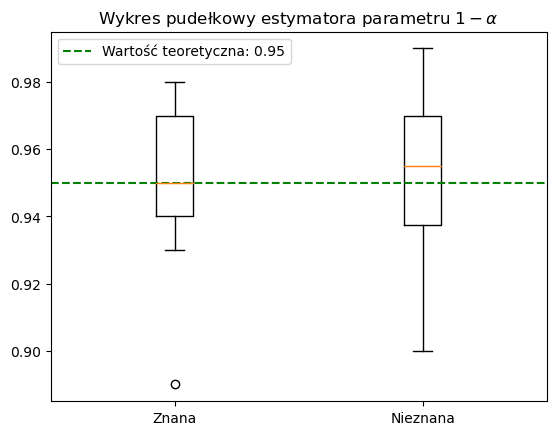

In [219]:
import pandas as pd
df = pd.DataFrame(wyniki, columns=['n', 'Estymator_parametru_var_known', 'Estymator_parametru_var_unknown'])

plt.boxplot([df['Estymator_parametru_var_known'], df['Estymator_parametru_var_unknown']], labels=['Znana', 'Nieznana'])
plt.axhline(1 - alpha, color='green', linestyle='--', label=f'Wartość teoretyczna: {1-alpha}')
plt.legend()
plt.title("Wykres pudełkowy estymatora parametru $1-\\alpha$")
plt.show()


In [220]:
wyniki_tabelka = []
MC = 1  

for n in ns:
    x, y = generowanie_p(n, b0, b1, sigma)
    x0 = np.mean(x) + gamma
    mi0 = b0 + b1 * x0

    a_known, b_known = przedział_ufności_mi0(x, y, gamma, alpha, sigma, b0, b1, True)
    należy_do_pu = 1 if a_known <= mi0 <= b_known else 0  

    wyniki_tabelka.append([n, round(mi0, 3), round(a_known, 3), round(b_known, 3), należy_do_pu]) #zaokrląfam sobie wyniki do 3 miejsc po przecinku

df = pd.DataFrame(wyniki_tabelka, columns=['n', 'μ_Y(x₀)', 'a', 'b', 'Czy μ_Y(x₀) ∈ [a, b]'])

print(df)




       n  μ_Y(x₀)         a         b  Czy μ_Y(x₀) ∈ [a, b]
0    100    206.0   205.725   206.117                     1
1    200    406.0   405.862   406.139                     1
2    300    606.0   605.880   606.106                     1
3    400    806.0   805.857   806.053                     1
4    500   1006.0  1005.931  1006.107                     1
5    600   1206.0  1205.917  1206.077                     1
6    700   1406.0  1405.955  1406.103                     1
7    800   1606.0  1605.927  1606.065                     1
8    900   1806.0  1805.956  1806.087                     1
9   1000   2006.0  2005.899  2006.023                     1
10  1100   2206.0  2206.017  2206.136                     0
11  1200   2406.0  2405.922  2406.035                     1
12  1300   2606.0  2605.928  2606.037                     1
13  1400   2806.0  2805.967  2806.072                     1
14  1500   3006.0  3005.919  3006.020                     1
15  1600   3206.0  3205.960  3206.058   

In [226]:
gammas=[0.5,1,2]

results=[]
for gamma in gammas:
    for sigma in sigmas:
        for n in ns:
            x, y = generowanie_próbek(n,b0,b1,sigma)
            known = przedział_ufności_mi0(x, y, gamma, alpha, sigma, b0, b1, True)
            unknown = przedział_ufności_mi0(x, y, gamma, alpha, sigma, b0, b1, False)
            results.append([alpha,sigma,gamma,n,known,unknown])

df = pd.DataFrame(results, columns=['alpha', 'sigma', 'gamma','n', 'pu_varknown','pu_varunknown'])
print(df)

     alpha  sigma  gamma     n                               pu_varknown  \
0     0.05   0.01    0.5   100    (207.998018988879, 208.00193949315158)   
1     0.05   0.01    0.5   200   (407.9990601785335, 408.00183208908885)   
2     0.05   0.01    0.5   300     (607.998464256332, 608.0007274652687)   
3     0.05   0.01    0.5   400    (807.9989223770817, 808.0008823593491)   
4     0.05   0.01    0.5   500   (1007.9998259643766, 1008.001579019934)   
..     ...    ...    ...   ...                                       ...   
175   0.05   1.00    2.0  1600  (3213.9227436549327, 3214.0207427717405)   
176   0.05   1.00    2.0  1700    (3413.97375871522, 3414.0688317218232)   
177   0.05   1.00    2.0  1800   (3613.9565305120545, 3614.048924783979)   
178   0.05   1.00    2.0  1900    (3813.944080590311, 3814.034010502722)   
179   0.05   1.00    2.0  2000   (4013.9874315826796, 4014.075084362124)   

                                pu_varunknown  
0    (207.99793660703614, 208.002021874

# Wnioski

- **Pokrycie jest stabilniejsze dla "Znana" wariancja:**
  - Krótsze wąsy i węższe pudełko oznaczają mniejszą zmienność w liczbie przypadków, w których parametr znajduje się w przedziale ufności.

- **Większa zmienność dla "Nieznana" wariancja:**
  - Długie wąsy wskazują, że liczba przypadków, w których parametr mieści się w przedziale, była bardziej zróżnicowana w różnych symulacjach Monte Carlo.
  - Dane są bardziej rozciągnięte, czyli wartości w danych są bardziej zróżnicowane.


<div style="text-align: font-family: 'Georgia'; font-size: 12px;">
    <h2>Zadanie 4</h2>
</div>

In [242]:
n=1000
b0=2
b1=4
sigma=2
alpha=0.05


def generowanie(n,b0,b1,sigma):
    e=np.random.normal(0,sigma,n)
    x=np.linspace(1,n+1,n)
    y=b0+b1*x+e
    return x,y


def prosta_regresji(x,y):
    b1_hat = np.sum(x*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
    b0_hat = np.mean(y) - b1_hat * np.mean(x)
    return b0_hat, b1_hat

x,y= generowanie(n,b0,b1,sigma)
x_990, y_990 = x[:990], y[:990]
b0_hat, b1_hat = prosta_regresji(x_990,y_990)


def b1_estim(x,y):
    return np.sum((x - np.mean(x)) * (y))/np.sum((x-np.mean(x))**2)

def b0_estim(x,y):
    return np.mean(y) - b1_estim(x,y) * np.mean(x)

def estymowanie_y0(x,y,gamma):
    x0 = np.mean(x) + gamma
    b0_hat1, b1_hat1= b0_estim(x,y), b1_estim(x,y)
    y0_hat=b0_hat1 +b1_hat1 * x0
    return y0_hat

def przedział_ufności4(x,y,gamma,alpha,sigma, b0, b1, known_var):
    n = len(x)
    x_0 = np.mean(x) + gamma
    y0_hat=estymowanie_y0(x,y,gamma)
    if known_var:
        margin= stats.norm.ppf(1-alpha/2) * sigma * np.sqrt(1+1/n + (x_0 - np.mean(x))**2/np.sum((x-np.mean(x))**2))
    else:
        s_squared = np.sum((y - (b0 + b1 * x))**2) / (n - 2)
        s = np.sqrt(s_squared)
        margin = stats.t.ppf(1-alpha/2,n-2) * s * np.sqrt(1+1/n + (x_0 - np.mean(x))**2/np.sum((x-np.mean(x))**2))
    return y0_hat - margin, y0_hat + margin

In [243]:
x_last = x[-10:]
y_last = y[-10:]

dolne_granice = []
górne_granice = []
for xi in x_last:
    ci = przedział_ufności4(x_990, y_990, xi - np.mean(x_990), alpha, sigma, b0_hat, b1_hat, known_var=True)
    dolne_granice.append(ci[0])
    górne_granice.append(ci[1])

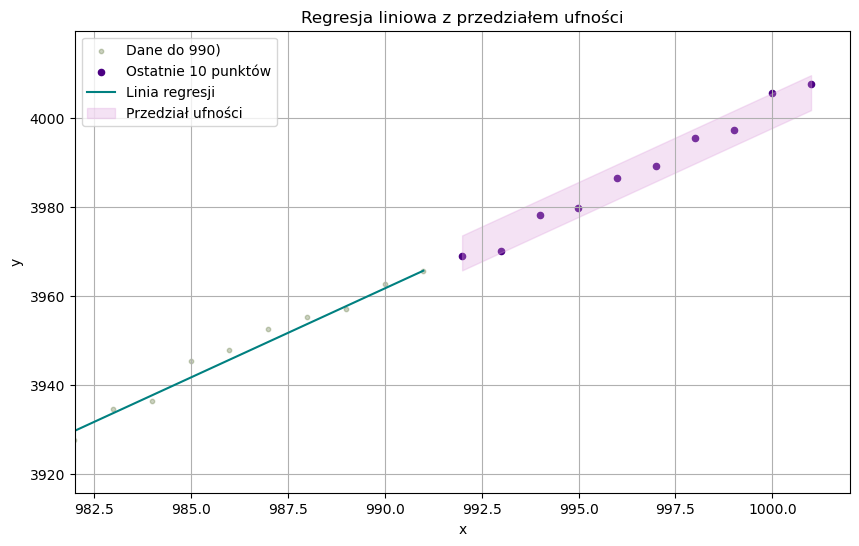

In [257]:
plt.figure(figsize=(10, 6))
plt.scatter(x_990, y_990, color="darkolivegreen", label="Dane do 990)", s=10, alpha=0.3)
plt.scatter(x_last, y_last, color="indigo", label="Ostatnie 10 punktów", s=20)
plt.plot(x_990, b0_hat + b1_hat * x_990, color="teal", label="Linia regresji")

plt.fill_between(x_last, dolne_granice, górne_granice, color="plum", alpha=0.3, label="Przedział ufności")


plt.xlim(x_last[0] - 10, x_last[-1]+1)
plt.ylim(min(dolne_granice) - 50, max(górne_granice) + 10)

plt.title("Regresja liniowa z przedziałem ufności")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()